In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levy_stable
from scipy import stats
from collections import Counter
import math

In [2]:
data = pd.read_csv('log_return_data.csv')
data


,log_return_vkco,log_return_tcs_il,log_return_poly_il,log_return_five_il
0,-0.013268,-0.005606,-0.005446,-0.013527
1,-0.036450,-0.001443,-0.031087,-0.024220
2,0.010426,0.000640,-0.015014,0.007743
3,-0.007898,0.002710,0.024230,-0.003066
4,-0.010866,0.013981,-0.012719,-0.007184
...,...,...,...,...
248,-0.008806,0.017210,0.028307,0.010042
249,0.017854,0.042740,0.027718,-0.006367
250,0.017500,0.037097,0.006849,0.036582
251,0.045782,0.033843,0.040659,-0.000150


### Для нахождения параметров воспользуемся формулой:  
### $ ln(-ln(\phi^2(|t|))) = ln(2\sigma^2) + \alpha ln(|t|),$ где $\phi$ — характерестическая функция распределения 

In [3]:
def charact_distr_func(t, dataframe, name, N):
    (y, x, _) = plt.hist(dataframe[name], bins=N)
    plt.close()
    x = x[:-1] - 1 # сдвигаю х на -1
    y = y / 253
    answer = 0
    for i in range(len(x)):
        id = complex(1, t * x[i])
        answer += math.exp(id.imag) * y[i]
    return answer

In [4]:
def get_log_log(t, dataframe, name, N):
    a = abs(charact_distr_func(t, data, name, N))
    return np.log(-np.log(a ** 2))

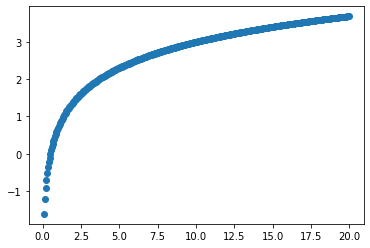

In [5]:
mass_x = np.array([])
mass_y = np.array([])

# функцию для отрицательных аргументов можно не рассматривать 
xx = np.arange(0.1, 20.0, 0.05)
for i in xx:
    mass_x = np.append(mass_x, i)
    mass_y = np.append(mass_y, get_log_log(i, data, 'log_return_vkco', 50))
    #mass_x.append(i)
    #mass_y.append(get_log_log(i, data, 'log_return_vkco', 50))
plt.scatter(mass_x, mass_y)

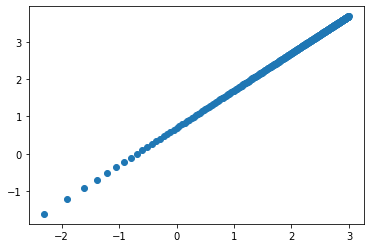

In [6]:
log_mass_x = np.log(mass_x)
plt.scatter(log_mass_x, mass_y)

In [8]:
N = 50
log_mass_x = np.log(mass_x)
mx = sum(log_mass_x) / N
my = sum(mass_y) / N
a2 = np.dot(log_mass_x.T, log_mass_x) / N
a11 = np.dot(log_mass_x.T, mass_y) / N
alpha = (a11 - mx * my) / (a2 - mx ** 2)
sigma_2 = my - alpha * mx


In [9]:
alpha

1.3541204938379943

In [10]:
beta = math.sqrt(math.exp(sigma_2) / 2)
beta

0.6468201338375316

### Проверяем, насколько данные параметры подходят

In [11]:
mean, var, skew, kurt = levy_stable.stats(alpha, beta, moments='mvsk')

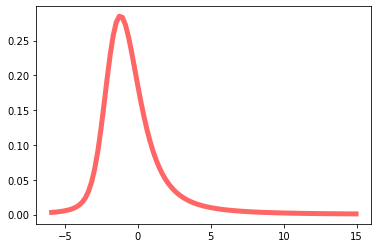

In [12]:
from scipy.stats import levy_stable
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)


x = np.linspace(levy_stable.ppf(0.01, alpha, beta), levy_stable.ppf(0.99, alpha, beta), 100)
ax.plot(x, levy_stable.pdf(x, alpha, beta), 'r-', lw=5, alpha=0.6, label='levy_stable pdf')

In [13]:
rv = levy_stable(alpha, beta)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [14]:
vals = levy_stable.ppf([0.001, 0.5, 0.999], alpha, beta)
np.allclose([0.001, 0.5, 0.999], levy_stable.cdf(vals, alpha, beta))

True

In [15]:
r = levy_stable.rvs(alpha, beta, size=100)

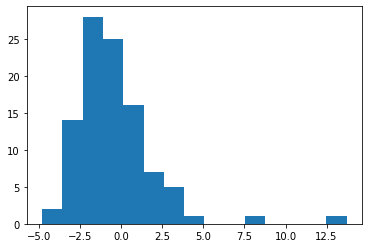

In [16]:

plt.hist(r, bins=15)
ax.legend(loc='best', frameon=False)
plt.show()